<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/CodingwithQiskitRuntime_Episode05_Primitives%26Sessions_mkbahk_20241218.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Install Qiskit

In [25]:
%pip install qiskit[all]==1.3.1
%pip install qiskit-ibm-runtime==0.34.0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.8/539.8 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 9.4 MB/s eta 0:00:00
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24059 sha256=a6adf2c7dc55e854a0cce2f7593dd8d616f4b7613c31ed0544b378ccef8e4287
  Stored in directory: /root/.cache/pip/wheels/2e/f2/2b/cb08b5fe129e4f69b7033061f256e5c551b0aa1160c2872aee
Successfully built python-constraint


In [24]:
%pip show qiskit qiskit-ibm-runtime

Name: qiskit
Version: 1.3.1
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-ibm-runtime
---
Name: qiskit-ibm-runtime
Version: 0.34.0
Summary: IBM Quantum client for Qiskit Runtime.
Home-page: 
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: ibm-platform-services, numpy, pydantic, python-dateutil, qiskit, requests, requests-ntlm, urllib3, websocket-client
Required-by: 


In [31]:
#from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import EfficientSU2

In [32]:
ansatz = EfficientSU2(2)

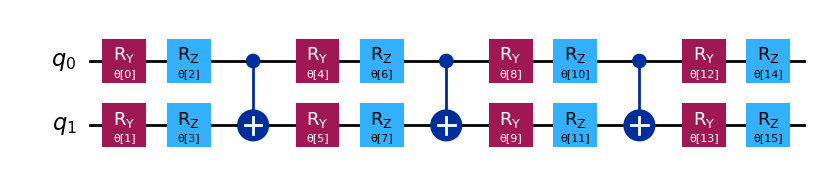

In [33]:
ansatz.decompose().draw('mpl')

##Step 1. Set up an Quantum Runtime Service channel

In [74]:
#from qiskit_ibm_runtime import QiskitRuntimeService
#service = QiskitRuntimeService(channel="ibm_cloud",
#                               token="",
#                               instance="crn:v1:bluemix:public:quantum-computing:us-east:a/71306d10032b425fb301ccb4c4df2a2c:54d1d0a2-bd74-45c7-9025-b302264b49cd::")
#service

<QiskitRuntimeService>

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum",
                               token="",
                               instance="ibm-q/open/main")
service

<QiskitRuntimeService>

In [33]:
#from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
#QiskitRuntimeService.save_account(
#    channel="ibm_cloud",
#    token="y",
#    instance="",
#    # Explicitly set instance to None for ibm_cloud channel
#    set_as_default=True,
#    # Use `overwrite=True` if you're updating your token.
#    overwrite=True,
#)

# Load saved credentials
#service = QiskitRuntimeService()

In [5]:
#backends= service.backends()
backends= service.backends(simulator=False, min_num_qubits=5)
backends

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyiv')>]

In [6]:
#backend = service.backends()[0]
#backend = service.least_busy(operational=True, simulator=False)
backend = service.backend("ibm_brisbane")
#backend = service.backend("ibmq_qasm_simulator")
#backend = service.backend("simulator_statevector")
#backend = service.backend("simulator_mps")
#backend = service.backend("simulator_stabilizer")

In [7]:
print(backend)

<IBMBackend('ibm_brisbane')>


In [8]:
from qiskit import QuantumCircuit, transpile
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

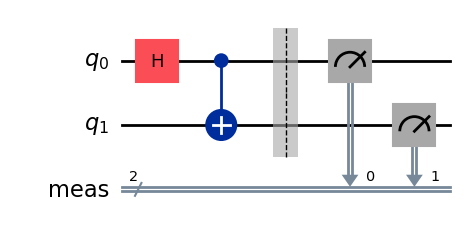

In [9]:
qc.draw('mpl')

In [10]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm1 = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm1.run(qc)

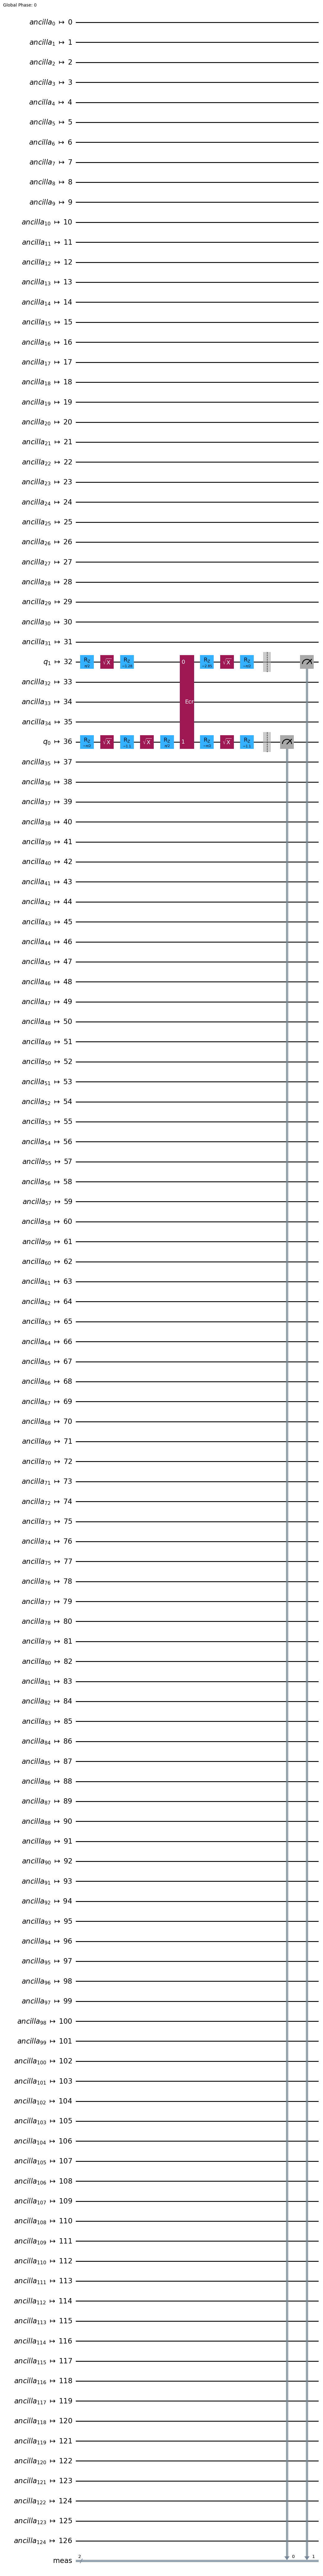

In [12]:
isa_circuit.draw('mpl')

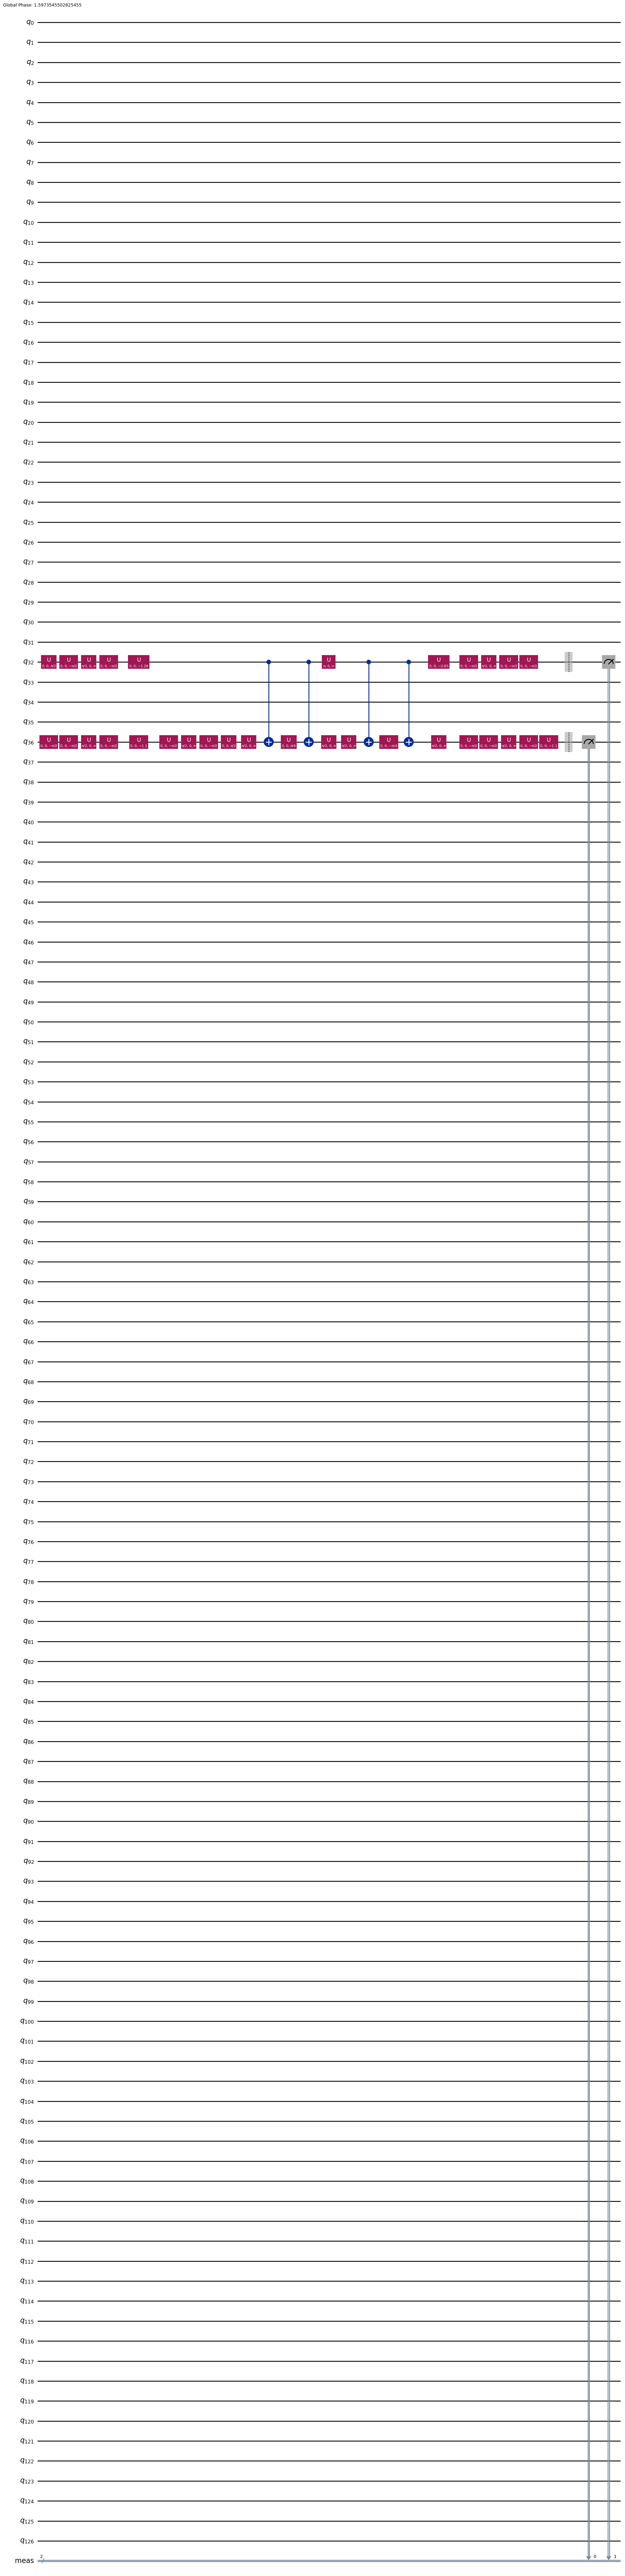

In [22]:
isa_circuit.decompose(reps=6).draw('mpl', fold=-2)

# Single Job Mode

In [41]:
#sampler = Sampler(backend)
#job = sampler.run([isa_circuit])

# Use the job ID to retrieve your job data later
#job_id=job.job_id()
#job_id

#Session Mode

In [60]:
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler, EstimatorV2 as Estimator

with Session(backend=backend) as session:
    sampler = Sampler()
    job = sampler.run([isa_circuit], shots=1024)
###with
job_id = job.job_id()

In [61]:
print("Job_ID:" + job_id + "\nJob Status:" + job.status())

Job_ID:cth1ve30j5nuvckpns1g
Job Status:DONE


Qiskit 1.x 초기버젼에는 아래와 같은 quasi_distribution list라는 결과가 나왔는데 최근 1.2.x 이상에는 없어진 것으로 판단됨.

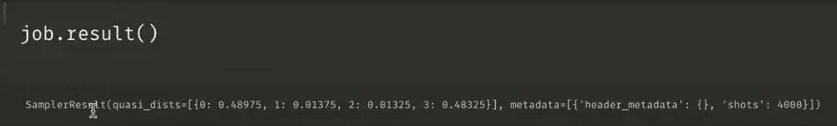

In [53]:
#job.inputs['circuits'][0].draw('mpl')

KeyError: 'circuits'

In [62]:
print(job.logs())

IBMRuntimeError: 'Failed to get job logs: "HTTPSConnectionPool(host=\'us-east.quantum-computing.cloud.ibm.com\', port=443): Max retries exceeded with url: /jobs/cth1ve30j5nuvckpns1g/logs (Caused by ResponseError(\'too many 500 error responses\'))"'

In [63]:
result = job.result()
result

PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-12-18 01:04:56', stop='2024-12-18 01:04:56', size=1024>)])}, 'version': 2})

In [64]:
# first job
print(f" > Counts for job 1: {result[0].data.meas.get_counts()}")

 > Counts for job 1: {'00': 517, '11': 507}


In [65]:
counts = result[0].data.meas.get_counts()

1.x 초기버젼에 결과보는 방법

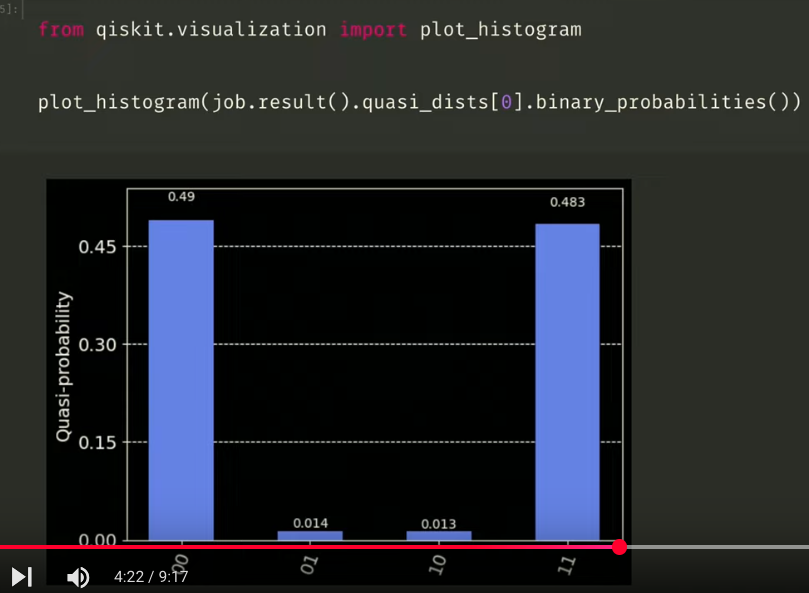

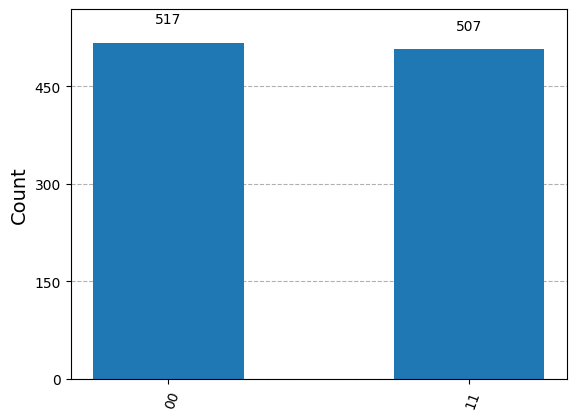

In [66]:
from qiskit.visualization import plot_histogram
plot_histogram([counts])

In [70]:
print(session.status)

<bound method Session.status of <qiskit_ibm_runtime.session.Session object at 0x7c02b2335e10>>


In [71]:
session.close()

In [72]:
#from friends import retrive_observable_and_ansatz
#obsv, qc, params = retrive_observable_and_ansatz()

ModuleNotFoundError: No module named 'friends'